In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, List

In [122]:
function_array = Callable[[np.array], np.array]
ChainRule = List[function_array]

class SimpleNN:
    
    def __init__(self):
        print("IN INIT METHOD")
        
    def square(self, x:np.array)-> np.array :
        return np.power(x,2)
    
    def leaky_relu(self, x:np.array)->np.array :
        return np.maximum(0.2*x,x)
    
    def sigmoid(self, x:np.array)-> np.array :
        return 1/1+np.exp(-x)
    
    def tanh(self, x:np.array)-> np.array :
        return (np.exp(2*x)-1)/(np.exp(2*x)+1)
    
    def derivative(self, function: Callable[[np.array], np.array], input_: np.array, delta: float=0.01)-> np.array :
        return (function(input_ + delta) - function(input_-delta))/(2*delta)
    
    def chain_derivative(self, functionChain : ChainRule, input: np.array)-> np.array :
        first_function = functionChain[0]
        second_function = functionChain[1]
        derivative_of_x = self.derivative(first_function, input)
        derivative_of_u = self.derivative(second_function, first_function(input))

        return derivative_of_x * derivative_of_u 


In [123]:
nn_model = SimpleNN()

IN INIT METHOD


In [124]:
input = np.arange(-3,3,.01)

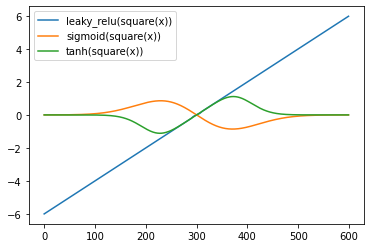

In [133]:
ChainRule = [nn_model.square, nn_model.leaky_relu]
plt.plot(nn_model.chain_derivative(ChainRule, input))

ChainRule = [nn_model.square, nn_model.sigmoid]
plt.plot(nn_model.chain_derivative(ChainRule, input))

ChainRule = [nn_model.square, nn_model.tanh]
plt.plot(nn_model.chain_derivative(ChainRule, input))
plt.legend(["leaky_relu(square(x))","sigmoid(square(x))","tanh(square(x))"]) 